# Imports

In [1]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pydub import AudioSegment
import wave
import math

# Loading data

In [2]:
main_directory = os.getcwd() + "\\datasets\\gandalf\\wavs\\"
audio_lengths = []

files = [f for f in os.listdir(main_directory) if os.path.isfile(os.path.join(main_directory, f))]
for f in files:
    audio = AudioSegment.from_file(main_directory + f)
    audio_lengths.append(audio.duration_seconds)

In [3]:
data = pd.DataFrame(audio_lengths, columns=["Length"])
data.head()

,Length
0,6.980907
1,9.015873
2,5.895873
3,9.168889
4,10.842902


In [4]:
data["Length"].describe()

count    1105.000000
mean        6.445909
std         2.823898
min         2.289932
25%         4.008889
50%         5.999909
75%         8.184898
max        15.930884
Name: Length, dtype: float64

# Dataset length (s)

In [5]:
data_audio = data["Length"].sum()
data_audio_formatted = '{} hours {} minutes {} seconds'.format(
    math.floor(data_audio / 3600), 
    round((data_audio % 3600) / 60),
    round((data_audio % 3600) % 60, 1))
print("Total dataset length:", data_audio_formatted)

Total dataset length: 1 hours 59 minutes 42.7 seconds


C:\Users\bartl\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of audio file lengths in gandalf dataset')

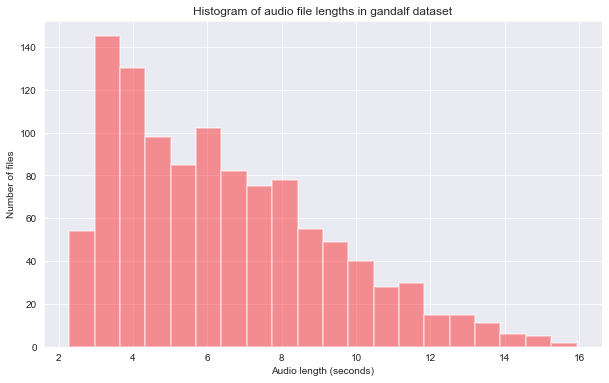

In [6]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.distplot(data["Length"], bins=20, kde=False, hist_kws={"linewidth": 2, "color": "r"})
plt.xlabel("Audio length (seconds)")
plt.ylabel("Number of files")
plt.title("Histogram of audio file lengths in gandalf dataset")

# Sample file characteristics

Text(0.5, 1.0, 'Sample audio plot')

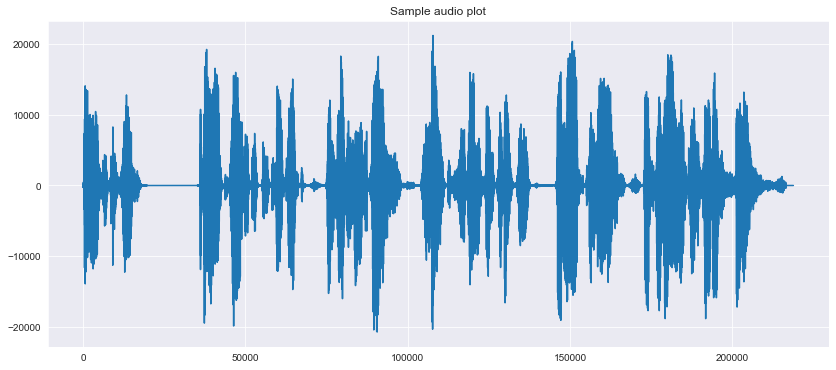

In [7]:
file_name = main_directory + "GANDALF-0009.wav"
audio_file = wave.open(file_name, "r")
signal = audio_file.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
plt.figure(figsize=(14, 6))
sns.lineplot(data=signal)
plt.title("Sample audio plot")